In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Homework 1
## INFO 4871 / 5871
## _Juan Vargas-Murillo_

The purpose of this assignment is gain experience working with user profile data as commonly found in recommender systems. 

### Hints

The following functions of the Pandas API are worth refreshing your memory on:

- `read_csv`
- `DataFrame.groupby`
- `DataFrame.query`
- `DataFrame.join`
- `DataFrame.crosstab`

Also, the sections of the Pandas documentation on "Indexing and Selecting Data" and "Group By: split-apply-combine".

### More hints
The third-ranked item produced by each recommender should be:

- `PopFreq`: _Forrest Gump_
- `PopFreq` (Filtered): _Lord of the Rings: Fellowship of the Ring_
- `PopRating`: _Touch of Evil_
- `PopRating` (Filtered): _Fight Club_

## Step 1
Load the MovieLens data. There are three files: ratings.csv, movies.csv, tags.csv. Note: the files use "Latin 1" encoding. You'll need to include this information in the call to `read_csv`. Use the `head()` function to show the contents of each data frame after you read it. Hint: Your life will be easier later if you use `movies.set_index('movieId')` to set the index of the `movies` data frame to be the movie id. 

In [29]:
movies = pd.read_csv('movies.csv', encoding='Latin 1')

movies_si = movies.set_index('movieId')

movies_si.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('ratings.csv', encoding='Latin 1')
ratings.head()

,userId,movieId,rating,timestamp
0,12882,1,4.0,1147195252
1,12882,32,3.5,1147195307
2,12882,47,5.0,1147195343
3,12882,50,5.0,1147185499
4,12882,110,4.5,1147195239


In [4]:
tags = pd.read_csv('tags.csv', encoding='Latin 1')
tags.head()

,movieId,userId,tag,timestamp
0,3916,12882,sports,1147195545
1,4085,12882,Eddie Murphy,1147195966
2,33660,12882,boxing,1147195514
3,1197,320,must show,1145964801
4,1396,320,must show,1145964810


## Step 2

- Compute a rating count data frame: for each movie, how many times has it been rated? (Value of the rating doesn't count)
- Compute the minimum value. Identify the name of a movie that has this minimum count? INFO 5871: (optional for INFO 4871: No hard-coded values.)
- Compute the maximum value. Identify the name of a movie that has the maximum count? INFO 5871: (optional for INFO 4871: No hard-coded values.)
- Plot the rating count distribution as a histogram.


### Create the rating count data frame

In [91]:
rating_count = ratings.groupby('movieId').agg({'rating':'count'}).rename(columns={'rating':'count'})

len(rating_count)

2500

### Minimum rated movie
Hard-coded method

In [33]:
mini_rate = rating_count.min()[0]
mini_rate

3

In [34]:
idx_mini_rate = rating_count.idxmin()[0]
idx_mini_rate

340

In [80]:
print(f"The movie rated {mini_rate} times is {movies_si.loc[idx_mini_rate]['title']}")

The movie rated 3 times is War, The (1994)


The movie rated 3 times is War, The (1994)


Non-hard-coded method

In [81]:
mini_rate = rating_count.min()[0]
mini_rate

idx_mini_rate = rating_count.idxmin()[0]
idx_mini_rate

print(f"The movie rated {mini_rate} times is {movies_si.loc[idx_mini_rate]['title']}")

The movie rated 3 times is War, The (1994)


Alternative using inner join

In [82]:
res = pd.merge(ratings[['userId', 'rating', 'movieId']], movies[['title', 'movieId']],
              on='movieId',
              how='inner')
min_rate = res.groupby('title').agg({'movieId':'count', 'rating':'count'}).min()[0]
min_mov = res.groupby('title').agg({'movieId':'count', 'rating':'count'}).idxmin()[0]

print(f"The movie rated {min_rate} times is {min_mov}")



The movie rated 3 times is War, The (1994)


### Most-rated movie
Hard-coded method

In [50]:
maxi_rate = rating_count.max()[0]
maxi_rate

idx_maxi_rate = rating_count.idxmax()[0]
idx_maxi_rate

print(f"The movie rated {maxi_rate} is {movies_si.loc[idx_maxi_rate]['title']}")

The movie rated 668 is Matrix, The (1999)


The movie rated 668 times is Matrix, The (1999)


Non-hard-coded method (join)

In [49]:
res = pd.merge(ratings[['userId', 'rating', 'movieId']], movies[['title', 'movieId']],
              on='movieId',
              how='inner')
max_rate = res.groupby('title').agg({'movieId':'count', 'rating':'count'}).max()[0]
max_mov = res.groupby('title').agg({'movieId':'count', 'rating':'count'}).idxmax()[0]

print(f"The movie rated {max_rate} is {max_mov}")


The movie rated 668 is Matrix, The (1999)


Histogram. (Use bins of size 50.)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121cb37b8>]],
      dtype=object)

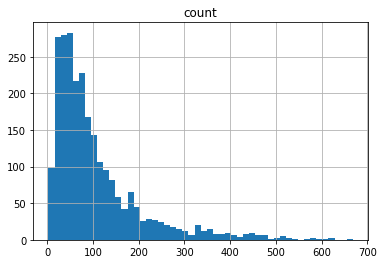

In [104]:
rating_count.hist(bins=50)
# mids = rating_count.index
# from matplotlib.pyplot import hist
# hist(mids, weights=rating_count['count'])
# rating_count.plot(x=mids, y='count', kind='hist')

## Step 3

- Compute the rating value distribution: for each possible rating value (0.5, 1,1.5,2.0,2.5, ..., 4.5, 5.0), how many movies have that rating?
- Plot the rating value distribution as a line plot

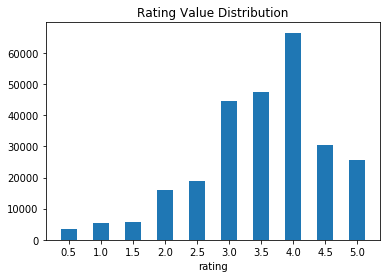

In [79]:
rvd = ratings.groupby('rating').agg({'rating': 'count'}).rename(columns={'rating':'count'})
rvd['ratings'] = rvd.index

plt.bar(rvd['ratings'], rvd['count'], width=.25)
plt.xticks(rvd['ratings'])
plt.xlabel('rating')
plt.title("Rating Value Distribution")
plt.show()

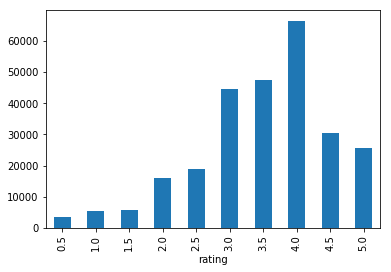

### _Question:_ What does this distribution tell you about the kind of preferences represented in the MovieLens data set?

This distribution tells us that the kind of preferences represented in the MovieLens data set is towards movies in the rating range of 3-4 stars. The movies with the most ratings are movies that fall within the rating range of 3-4.

## Step 4

- Compute the profile length distribution: for each user, how many ratings have they contributed?
- Compute the minimum value. Identify the id of the user that has this minimum count?
- Compute the maximum value. Identify the id of the user that has the maximum count?
- Plot the profile length distribution as a histogram.


### Create the profile length data frame

In [132]:
user_rating_contribution = ratings.groupby('userId').agg({'rating': 'count'}).rename(columns={'rating':'count'})
user_rating_contribution.head()


,count
userId,
316,129
320,62
359,833
370,411
910,677


Hard-coded

In [133]:
min_user = (user_rating_contribution.min()[0], user_rating_contribution.idxmin()[0])

max_user = (user_rating_contribution.max()[0], user_rating_contribution.idxmax()[0])


print(f"UserID: {min_user[1]} has rated {min_user[0]} movies.")
print(f"UserID: {max_user[1]} has rated {max_user[0]} movies.")

UserID: 138176 has rated 14 movies.
UserID: 76630 has rated 1900 movies.


Non-hard-coded

In [134]:
min_user = (user_rating_contribution.min()[0], user_rating_contribution.idxmin()[0])

max_user = (user_rating_contribution.max()[0], user_rating_contribution.idxmax()[0])


print(f"UserID: {min_user[1]} has rated {min_user[0]} movies.")
print(f"UserID: {max_user[1]} has rated {max_user[0]} movies.")

UserID: 138176 has rated 14 movies.
UserID: 76630 has rated 1900 movies.


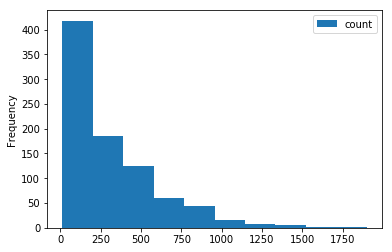

In [135]:
user_rating_contribution.plot(x=user_rating_contribution.index, y='count', kind='hist')

## Step 5
Build a non-personalized popularity-based top 20 recommender. Ignore the value of the rating and just count how many times a movie appears in someone's ratings. We will call this `PopFreq`.

Can re-use some of the results from above. Sort in descending order

In [175]:
# len(ratings[ratings['userId'] == 12882]['movieId']) == len(set(ratings[ratings['userId'] == 12882]['movieId']))

PopFreq = rating_count.sort_values(by=['count'], ascending=False)[:20]
PopFreq['movieId'] = PopFreq.index
PopFreq

,count,movieId
movieId,,
2571,668,2571
4993,628,4993
356,621,356
296,613,296
5952,597,5952
2959,588,2959
7153,577,7153
318,564,318
260,535,260


Join against the movie table to see what movies these are.

In [176]:
mt = pd.merge(PopFreq,
             movies[['title', 'movieId']],
             on='movieId',
             how='inner')

mt

,count,movieId,title
0,668,2571,"Matrix, The (1999)"
1,628,4993,"Lord of the Rings: The Fellowship of the Ring,..."
2,621,356,Forrest Gump (1994)
3,613,296,Pulp Fiction (1994)
4,597,5952,"Lord of the Rings: The Two Towers, The (2002)"
5,588,2959,Fight Club (1999)
6,577,7153,"Lord of the Rings: The Return of the King, The..."
7,564,318,"Shawshank Redemption, The (1994)"
8,535,260,Star Wars: Episode IV - A New Hope (1977)
9,533,593,"Silence of the Lambs, The (1991)"


## Step 5.5 (INFO 5871 only)
Build a filtered version of `PopFreq` in which ratings below 4 are filtered out. Hint: the `DataFrame.query` function is handy for this.

In [203]:
PopFreqFiltered = rating_count.sort_values(by=['count'], ascending=False)[:20]
PopFreqFiltered['movieId'] = PopFreqFiltered.index
mtf = pd.merge(PopFreqFiltered,
             ratings[['rating', 'movieId']],
             on='movieId',
             how='inner')

gtf = mtf[mtf['rating'] >= 4]

m = gtf.sort_values(by=['rating'], ascending=False)

tab = pd.merge(m,
              movies[['title', 'movieId']],
              on='movieId',
              how='inner')
tab.drop_duplicates()
# set(tab[['title', 'rating']])


,count,movieId,rating,title
0,513,1270,5.0,Back to the Future (1985)
101,513,1270,4.5,Back to the Future (1985)
185,513,1270,4.0,Back to the Future (1985)
356,597,5952,5.0,"Lord of the Rings: The Two Towers, The (2002)"
519,597,5952,4.5,"Lord of the Rings: The Two Towers, The (2002)"
614,597,5952,4.0,"Lord of the Rings: The Two Towers, The (2002)"
788,516,2858,5.0,American Beauty (1999)
913,516,2858,4.5,American Beauty (1999)
1011,516,2858,4.0,American Beauty (1999)
1171,588,2959,5.0,Fight Club (1999)


### _Question:_ What movie no longer appears in the top 10 after filtering by rating value? What must be true of this movie for this to be the case?

_Answer_: (max 50 words) 

## Step 6
Build non-peraonalized recommender that orders the movies by average rating. We will call this version `PopRating`.

In [180]:
PopRating = ratings.groupby('movieId').agg({'rating':'mean'})
PopRating = PopRating.sort_values(by=['rating'], ascending=False)[:20]
PopRating['movieId'] = PopRating.index
PopRating


,rating,movieId
movieId,,
318,4.364362,318
858,4.315848,858
1248,4.259259,1248
2959,4.258503,2959
7502,4.247423,7502
1203,4.246032,1203
2859,4.220000,2859
1221,4.218462,1221
296,4.217781,296


In [181]:
rt = pd.merge(PopRating,
             movies[['title', 'movieId']],
             on='movieId',
             how='inner')

rt

,rating,movieId,title
0,4.364362,318,"Shawshank Redemption, The (1994)"
1,4.315848,858,"Godfather, The (1972)"
2,4.259259,1248,Touch of Evil (1958)
3,4.258503,2959,Fight Club (1999)
4,4.247423,7502,Band of Brothers (2001)
5,4.246032,1203,12 Angry Men (1957)
6,4.220000,2859,Stop Making Sense (1984)
7,4.218462,1221,"Godfather: Part II, The (1974)"
8,4.217781,296,Pulp Fiction (1994)
9,4.195359,2571,"Matrix, The (1999)"


### _Question:_ This list is quite different from the `PopFreq` list. What must be true of "The Godfather" for it to appear on this list, but not the other one?

The Godfather appears on this list because even though it did not have a high frequency of ratings from users it did have high quality ratings from a few users. 

## Step 6.5 (INFO 5871 only)
Build a version of `PopRating` that drops movies that have been rated less than 100 times

- Do frequency table
- Filter out the movies with fewer than 100 ratings
- Join with `means`
- Sort this

### _Question:_ Compare this list with `PopRating` and identify a movie that no longer appears in the top 10? What movie is it? What must be true of this movie for this to be the case?

_Answer_: (max 50 words)